<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1CMR8SvZWQa31_aMOpJBys5LVNakbGsRV/view?usp=sharing



https://drive.google.com/file/d/1vug2SdRcH9aj831C3RQymHBnykCmzzNI/view?usp=drive_link

https://www.kaggle.com/code/miroslavkirnak/ufc-eda-and-prediction/notebook

https://www.kaggle.com/code/gurharkhalsa/most-accurate-fighter-pred

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# predict

https://www.kaggle.com/datasets/martj42/mma-fight-predictions-by-professional-fighters

The data is gathered mostly from James Lynch's YouTube channel, where fighters are asked to predict upcoming fights. Currently, the dataset includes 2,552 made predictions of 244 fights since the end of 2015 up to today.
https://www.youtube.com/channel/UCsK80SSNnnGkb2pwPgblMsA

In [ ]:
!gdown --id 1nJDGvxwSBtWJu04_ZPRuMvaaD6ouncXF

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nJDGvxwSBtWJu04_ZPRuMvaaD6ouncXF
To: /content/predictions.csv
100% 219k/219k [00:00<00:00, 25.6MB/s]


In [ ]:
df = pd.read_csv('/content/predictions.csv')

In [ ]:
df.head(3)

,winner,loser,date,winner_odds,predictor,correct
0,Conor McGregor,Jose Aldo,2015-12-12,-104.0,Andrei Arlovski,False
1,Conor McGregor,Jose Aldo,2015-12-12,-104.0,Alexander Gustafsson,True
2,Conor McGregor,Jose Aldo,2015-12-12,-104.0,Travis Browne,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winner       3401 non-null   object 
 1   loser        3401 non-null   object 
 2   date         3401 non-null   object 
 3   winner_odds  3401 non-null   float64
 4   predictor    3401 non-null   object 
 5   correct      3401 non-null   bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 136.3+ KB


In [ ]:
df.describe()

,winner_odds
count,3401.000000
mean,-128.183011
std,302.968404
min,-1564.000000
25%,-266.000000
50%,-142.000000
75%,132.560000
max,481.000000


In [ ]:
dfcat = df.drop('winner_odds', axis =1)

In [ ]:
dfcat.describe()

,winner,loser,date,predictor,correct
count,3401,3401,3401,3401,3401
unique,116,161,183,460,2
top,Khabib Nurmagomedov,Conor McGregor,2021-03-06,Stephen Thompson,True
freq,143,142,179,85,1844


In [ ]:
df.groupby('correct').count()

,winner,loser,date,winner_odds,predictor
correct,,,,,
False,1557,1557,1557,1557,1557
True,1844,1844,1844,1844,1844


<Axes: >

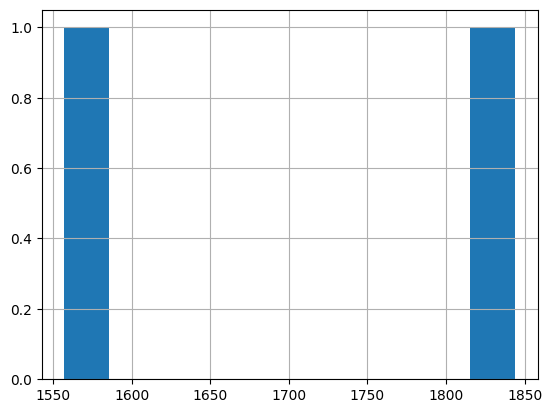

In [ ]:
df.groupby('correct').count()['winner'].hist()

<Axes: ylabel='winner'>

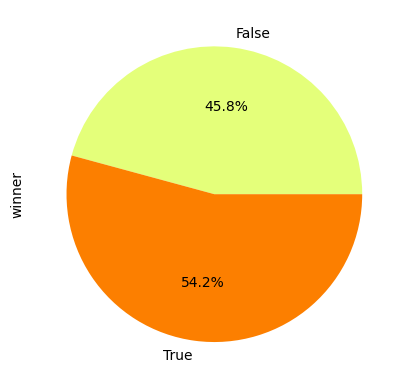

In [ ]:
df.groupby('correct').count()['winner'].plot(kind= 'pie', y='correct', autopct="%.1f%%", colormap='Wistia')

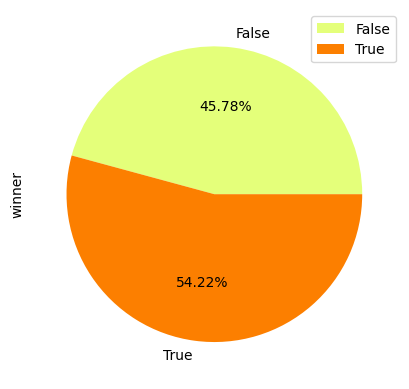

In [ ]:
df.groupby('correct').count()['winner'].plot(kind= 'pie', y='attendees',autopct="%.2f%%", colormap='Wistia').legend(bbox_to_anchor= (1.01, 1))

In [ ]:
df['type'] = df['correct'].astype('category')

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

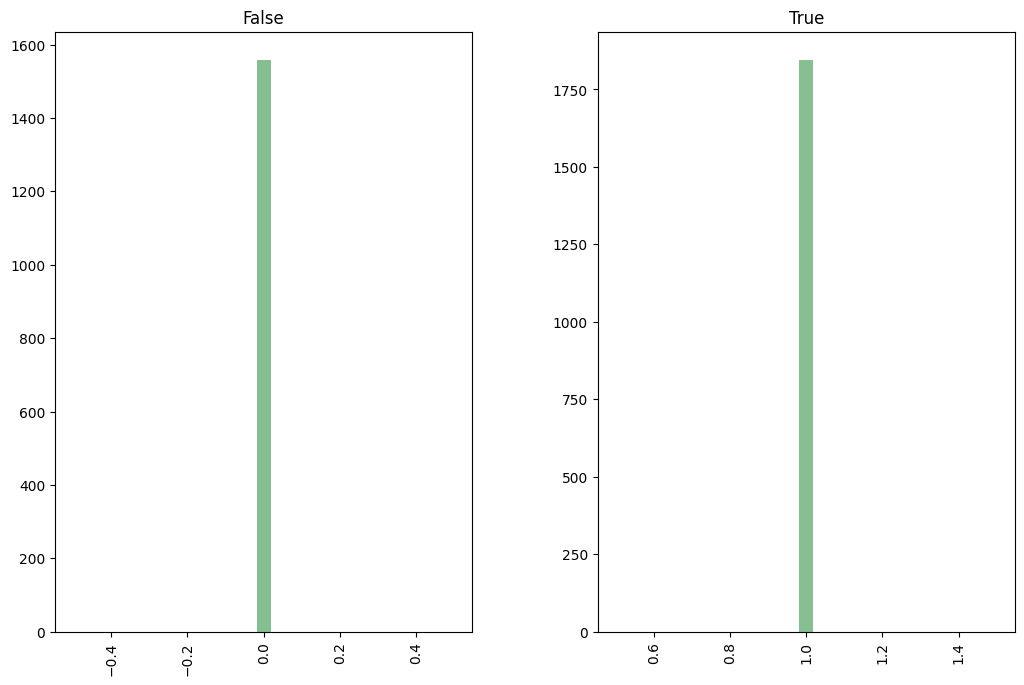

In [ ]:
df.hist(column='type', by='correct', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


## kaggle version

In [ ]:
predictors = {}
total_right = 0
total = 0
for i, obj in df.iterrows():
    if obj["predictor"] not in predictors:
        if obj["correct"] == True:
            predictors[obj["predictor"]] = [1, 0]
            total_right += 1
            total += 1
        else:
            predictors[obj["predictor"]] = [0, 1]
            total += 1
    else:
        # if in predictors dict and correct prediction
        if obj["correct"] == True:
            predictors[obj["predictor"]][0] += 1
            total_right += 1
            total += 1
        else:
            predictors[obj["predictor"]][1] += 1
            total += 1

max_corr_pred_fighter = ""
max_pred = 0
for pred in predictors.keys():

    if predictors[pred][0] > max_pred:
        max_pred = predictors[pred][0]
        max_corr_pred_fighter = pred

print("overall fighter prediction accuracy = ", total_right/total)
print("fighter with most correct predictions = ", max_corr_pred_fighter)

overall fighter prediction accuracy =  0.5421934725080858
fighter with most correct predictions =  Stephen Thompson


In [ ]:
for pred in predictors.keys():
    if predictors[pred][0] + predictors[pred][1] < 10:
        predictors[pred] = 0
    else:
        predictors[pred] = predictors[pred][0]/(predictors[pred][0] + predictors[pred][1])

In [ ]:
import operator
sorted_pred = sorted(predictors.items(), key=operator.itemgetter(1), reverse=True)
for pred in sorted_pred:
    if pred[0] == "Stephen Thompson":
        print("Stephen Thompson's Accuracy: ",pred[1])

Stephen Thompson's Accuracy:  0.5411764705882353


In [ ]:
top_predictors = sorted_pred[:30]

In [ ]:
top_predictors

[('Jared Gordon', 0.8823529411764706),
 ('Mike Rhodes', 0.8),
 ('Eddie Alvarez', 0.8),
 ('Alexander Volkanovski', 0.7333333333333333),
 ('Misha Cirkunov', 0.7272727272727273),
 ('Matt Schnell', 0.7058823529411765),
 ('Vicente Luque', 0.7058823529411765),
 ('Joe Duffy', 0.6923076923076923),
 ('Renato Moicano', 0.6875),
 ('Cynthia Calvillo', 0.6842105263157895),
 ('Dominick Reyes', 0.6764705882352942),
 ('Marion Reneau', 0.6666666666666666),
 ('Gillian Robertson', 0.6666666666666666),
 ('Randa Markos', 0.65),
 ('Ian Heinisch', 0.6470588235294118),
 ('Randy Brown', 0.6428571428571429),
 ('Jason Knight', 0.6428571428571429),
 ('Pedro Munhoz', 0.6428571428571429),
 ('Marvin Vettori', 0.6363636363636364),
 ('Montana de la Rosa', 0.6363636363636364),
 ('Matt Frevola', 0.6363636363636364),
 ('Lando Vannata', 0.6363636363636364),
 ('Miranda Granger', 0.6363636363636364),
 ('Dwight Grant', 0.6153846153846154),
 ('Albert Morales', 0.6129032258064516),
 ('Volkan Oezdemir', 0.6111111111111112),
 ('

In [ ]:
predictors1 = dict(sorted(predictors.items(), key=lambda x: (x[1], x[0])))
predictors1

{'A.J. McKee': 0,
 'Aaron Pico': 0,
 'Abu Azaitar': 0,
 'Adam Milstead': 0,
 'Adrian Yanez': 0,
 'Aleksandar Rakic': 0,
 'Alex Morono': 0,
 'Alex Perez': 0,
 'Alexander Gustafsson': 0,
 'Alexander Volkov': 0,
 'Alexey Oleynik': 0,
 'Alexi Argyriou': 0,
 'Alexis Davis': 0,
 'Amanda Cooper': 0,
 'Amir Albazi': 0,
 'Andre Ewell': 0,
 'Andre Fili': 0,
 'Andre Soukhamthath': 0,
 'Andrei Arlovski': 0,
 'Andrew Sanchez': 0,
 'Andy Nguyen': 0,
 'Angela Lee': 0,
 'Anna Elmose': 0,
 'Anthony Gutierrez': 0,
 'Anthony Pettis': 0,
 'Arjan Bhullar': 0,
 'Artem Lobov': 0,
 'Ashlee Evans-Smith': 0,
 'Ashley Cummins': 0,
 'Austin Arnett': 0,
 'Austin Lingo': 0,
 'Austin Vanderford': 0,
 'Bea Malecki': 0,
 'Ben Nguyen': 0,
 'Ben Rothwell': 0,
 'Benson Henderson': 0,
 'Billy Quarantillo': 0,
 'Bobby Nash': 0,
 'Bobby Voelker': 0,
 'Bojan Velickovic': 0,
 'Brad Katona': 0,
 'Brad Pickett': 0,
 'Brad Tavares': 0,
 'Brandi Narvaez': 0,
 'Brandon Davis': 0,
 'Brandon Girtz': 0,
 'Brandon Moreno': 0,
 'Brando

In [ ]:
x, y = zip(*top_predictors)

<BarContainer object of 30 artists>

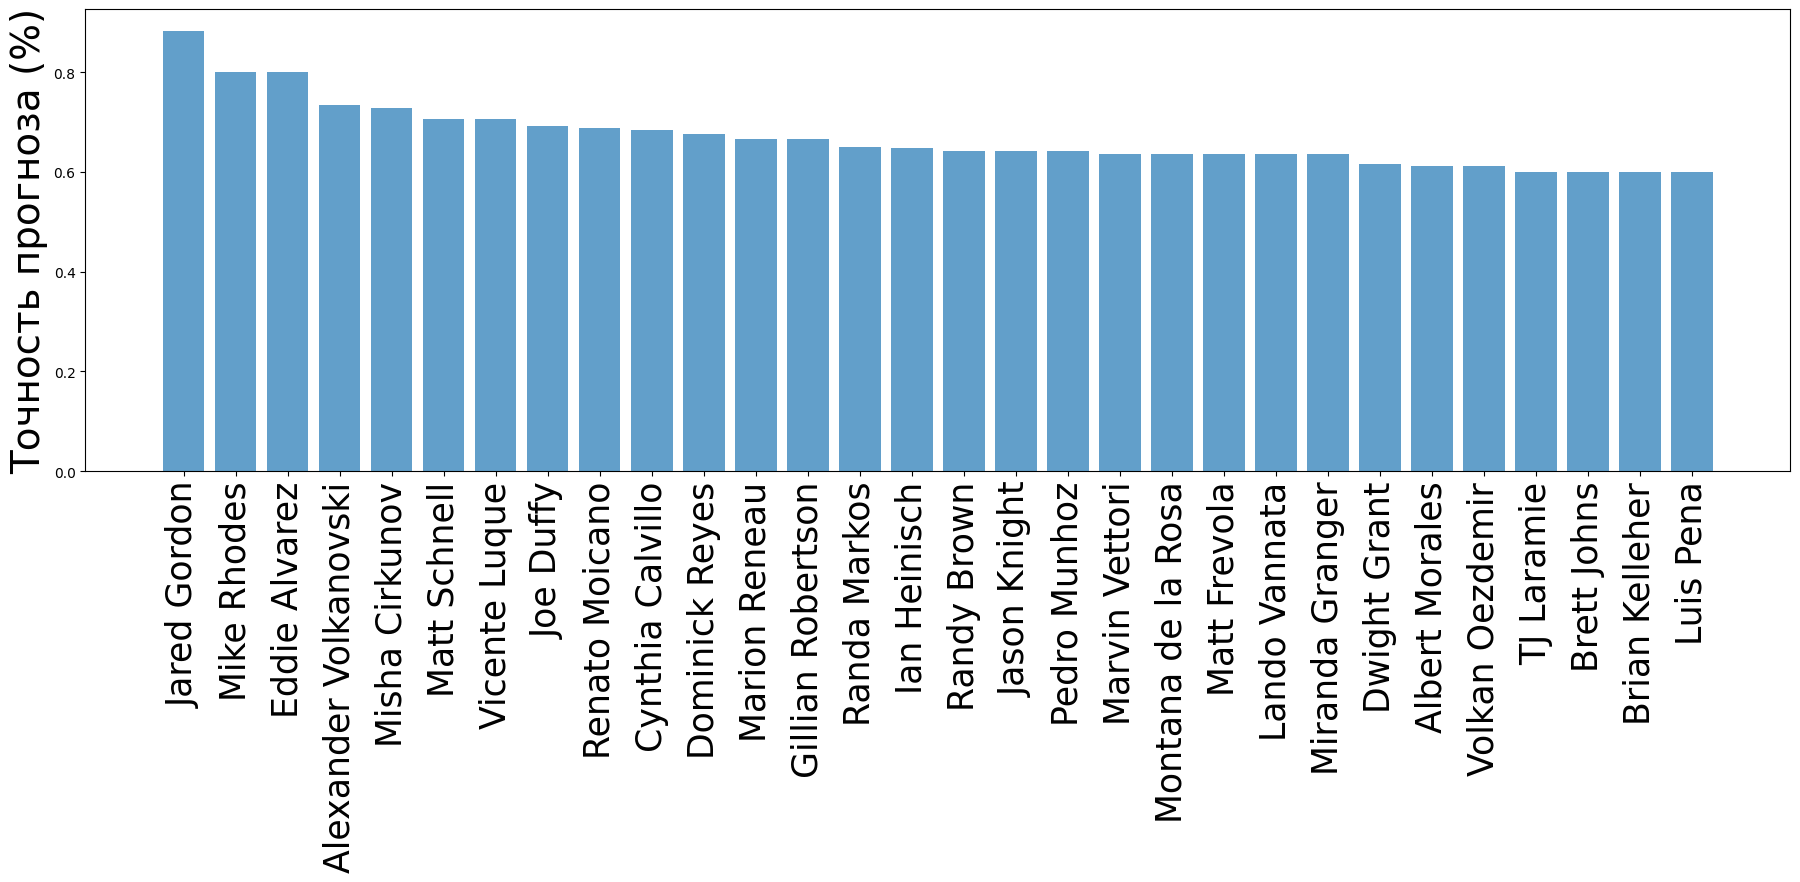

In [ ]:
plt.rcParams["figure.figsize"] = (22,6)
plt.xticks(rotation=90, fontsize=25)
plt.ylabel("Точность прогноза (%)", fontsize=28)
#plt.xlabel("Спортсмены", fontsize=28)
plt.bar(x, y, alpha=.7)

In [ ]:
df.columns

Index(['winner', 'loser', 'date', 'winner_odds', 'predictor', 'correct',
       'type'],
      dtype='object')

In [ ]:
dfac = df.groupby(['predictor', 'type']).count()['winner']
dfac = pd.DataFrame(dfac)
dfac

winner
predictor     type         
A.J. McKee    False       2
              True        0
Aaron Pico    False       1
              True        1
Abu Azaitar   False       0
...                     ...
Zach Makovsky True        1
Zak Cummings  False       6
              True        4
Zak Ottow     False       1
              True        8

[920 rows x 1 columns]

In [ ]:

pd.pivot_table(df,index=["predictor",  'correct'])

<ipython-input-25-05f299d33a35>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index=["predictor",  'correct'])


winner_odds
predictor     correct             
A.J. McKee    False    -237.500000
Aaron Pico    False    -201.000000
              True     -265.000000
Abu Azaitar   True     -190.000000
Adam Milstead False     139.000000
...                            ...
Zach Makovsky True     -221.000000
Zak Cummings  False       0.833333
              True     -144.000000
Zak Ottow     False    -166.000000
              True     -204.750000

[740 rows x 1 columns]

In [ ]:
df.groupby(['predictor']).count()['winner']


predictor
A.J. McKee          2
Aaron Pico          2
Abu Azaitar         1
Adam Milstead       6
Adam Townsend      21
                   ..
Yana Kunitskaya     1
Youssef Zalal       9
Zach Makovsky       2
Zak Cummings       10
Zak Ottow           9
Name: winner, Length: 460, dtype: int64

In [ ]:
df.groupby('predictor')['predictor'].count()

predictor
A.J. McKee          2
Aaron Pico          2
Abu Azaitar         1
Adam Milstead       6
Adam Townsend      21
                   ..
Yana Kunitskaya     1
Youssef Zalal       9
Zach Makovsky       2
Zak Cummings       10
Zak Ottow           9
Name: predictor, Length: 460, dtype: int64

In [ ]:
#dfac['freq'] = df.groupby('predictor')['predictor'].transform('count')
dfac

winner
predictor     type         
A.J. McKee    False       2
              True        0
Aaron Pico    False       1
              True        1
Abu Azaitar   False       0
...                     ...
Zach Makovsky True        1
Zak Cummings  False       6
              True        4
Zak Ottow     False       1
              True        8

[920 rows x 1 columns]

In [ ]:
dfac

winner
predictor     type         
A.J. McKee    False       2
              True        0
Aaron Pico    False       1
              True        1
Abu Azaitar   False       0
...                     ...
Zach Makovsky True        1
Zak Cummings  False       6
              True        4
Zak Ottow     False       1
              True        8

[920 rows x 1 columns]

In [ ]:
df1 = pd.get_dummies(df, columns = ['type'])

In [ ]:
dfres = df1.groupby('predictor').sum()
dfres = dfres.drop('correct', axis =1)
dfres['total']= dfres['type_False'] + dfres['type_True']
dfres['accurate'] = dfres['type_True']/dfres['total']
dfres

<ipython-input-31-2dfa75c4446b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfres = df1.groupby('predictor').sum()


,winner_odds,type_False,type_True,total,accurate
predictor,,,,,
A.J. McKee,-475.0,2,0,2,0.000000
Aaron Pico,-466.0,1,1,2,0.500000
Abu Azaitar,-190.0,0,1,1,1.000000
Adam Milstead,-21.0,2,4,6,0.666667
Adam Townsend,-2480.0,11,10,21,0.476190
...,...,...,...,...,...
Yana Kunitskaya,163.0,1,0,1,0.000000
Youssef Zalal,-1226.0,3,6,9,0.666667
Zach Makovsky,-30.0,1,1,2,0.500000


In [ ]:
df2 = dfres.sort_values(['total', 'accurate'],
              ascending = [False, False])
df2

,winner_odds,type_False,type_True,total,accurate
predictor,,,,,
Stephen Thompson,-10289.00,39,46,85,0.541176
Brian Kelleher,-11351.00,28,42,70,0.600000
Eryk Anders,-8044.09,31,36,67,0.537313
Curtis Blaydes,-8694.00,26,38,64,0.593750
Kevin Lee,-9039.73,28,35,63,0.555556
...,...,...,...,...,...
Tiffany van Soest,-305.00,1,0,1,0.000000
Vince Cachero,203.00,1,0,1,0.000000
Vitor Belfort,191.00,1,0,1,0.000000


In [ ]:
df3 = dfres.sort_values([ 'accurate','total'],
              ascending = [False, False])
df3

,winner_odds,type_False,type_True,total,accurate
predictor,,,,,
Patrick Cote,-2164.0,0,8,8,1.0
Kyle Daukaus,80.0,0,5,5,1.0
Olivier Aubin-Mercier,-785.0,0,5,5,1.0
Sijara Eubanks,-2675.0,0,5,5,1.0
Ray Borg,-753.0,0,4,4,1.0
...,...,...,...,...,...
Tiffany van Soest,-305.0,1,0,1,0.0
Vince Cachero,203.0,1,0,1,0.0
Vitor Belfort,191.0,1,0,1,0.0


In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df3, *[[['winner_odds', 'type_False'], ['type_False', 'type_True'], ['type_True', 'total'], ['total', 'accurate']]], **{})
chart

In [ ]:
dfres['type_False'].value_counts()[0]

102

In [ ]:
df0 = dfres[dfres['type_False']==0]
df0.sort_values(['total', 'accurate'],
              ascending = [False, False])

,winner_odds,type_False,type_True,total,accurate
predictor,,,,,
Patrick Cote,-2164.0,0,8,8,1.0
Kyle Daukaus,80.0,0,5,5,1.0
Olivier Aubin-Mercier,-785.0,0,5,5,1.0
Sijara Eubanks,-2675.0,0,5,5,1.0
Ray Borg,-753.0,0,4,4,1.0
...,...,...,...,...,...
Tom Lawlor,-277.0,0,1,1,1.0
Tony Kelley,-277.0,0,1,1,1.0
Tonya Evinger,-190.0,0,1,1,1.0


In [ ]:
df0['total'].unique()

array([1, 3, 2, 5, 8, 4], dtype=uint8)

In [ ]:
dfres[dfres['type_True']==0].index

Index(['A.J. McKee', 'Alexi Argyriou', 'Andrei Arlovski', 'Andy Nguyen',
       'Anthony Pettis', 'Bobby Voelker', 'Brad Tavares', 'Brandon Davis',
       'Brandon Girtz', 'Brooke Mayo', 'Bryce Mitchell', 'Christos Giagos',
       'Clay Guida', 'Collin Anglin', 'Cub Swanson', 'Daniel Spitz',
       'David Zawada', 'Demian Maia', 'Derrick Lewis', 'Desmond Green',
       'Emil Meek', 'Fabricio Werdum', 'Gabe Green', 'Gabriel Gonzaga',
       'Georgi Karakhanyan', 'Gina Mazany', 'Gunnar Nelson', 'Hunter Azure',
       'Jairzinho Rozenstruik', 'Jamall Emmers', 'Jeff Hughes',
       'Jeremiah Labiano', 'Jeremy May', 'Jeremy Stephens', 'Jessica Aguilar',
       'Jessica Rose-Clark', 'Jessica-Rose Clark', 'Jocelyn Jones-Lybarger',
       'John Castaneda', 'Jordan Rinaldi', 'Josh Koscheck', 'Julian Erosa',
       'Junior dos Santos', 'Justine Kish', 'Kate Jackson', 'Khaos Williams',
       'Kody Nordby', 'Kyle Nelson', 'Lanchana Green', 'Leonardo Santos',
       'Lerone Murphy', 'Liam McGeary'

In [ ]:
dfres[dfres['type_True']==1].index

Index(['Aaron Pico', 'Abu Azaitar', 'Alexander Volkov', 'Alexis Davis',
       'Andre Fili', 'Angela Lee', 'Anna Elmose', 'Anthony Gutierrez',
       'Ashlee Evans-Smith', 'Ashley Cummins',
       ...
       'Thiago Santos', 'Thomas Almeida', 'Tim Williams', 'Tom Lawlor',
       'Tony Kelley', 'Tonya Evinger', 'Travis Browne', 'Trevin Giles',
       'Trisha Cicero', 'Zach Makovsky'],
      dtype='object', name='predictor', length=122)

## кластерный анализ

In [ ]:

from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = dfres[['type_False', 'type_True', 'total', 'accurate']].copy()

In [ ]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

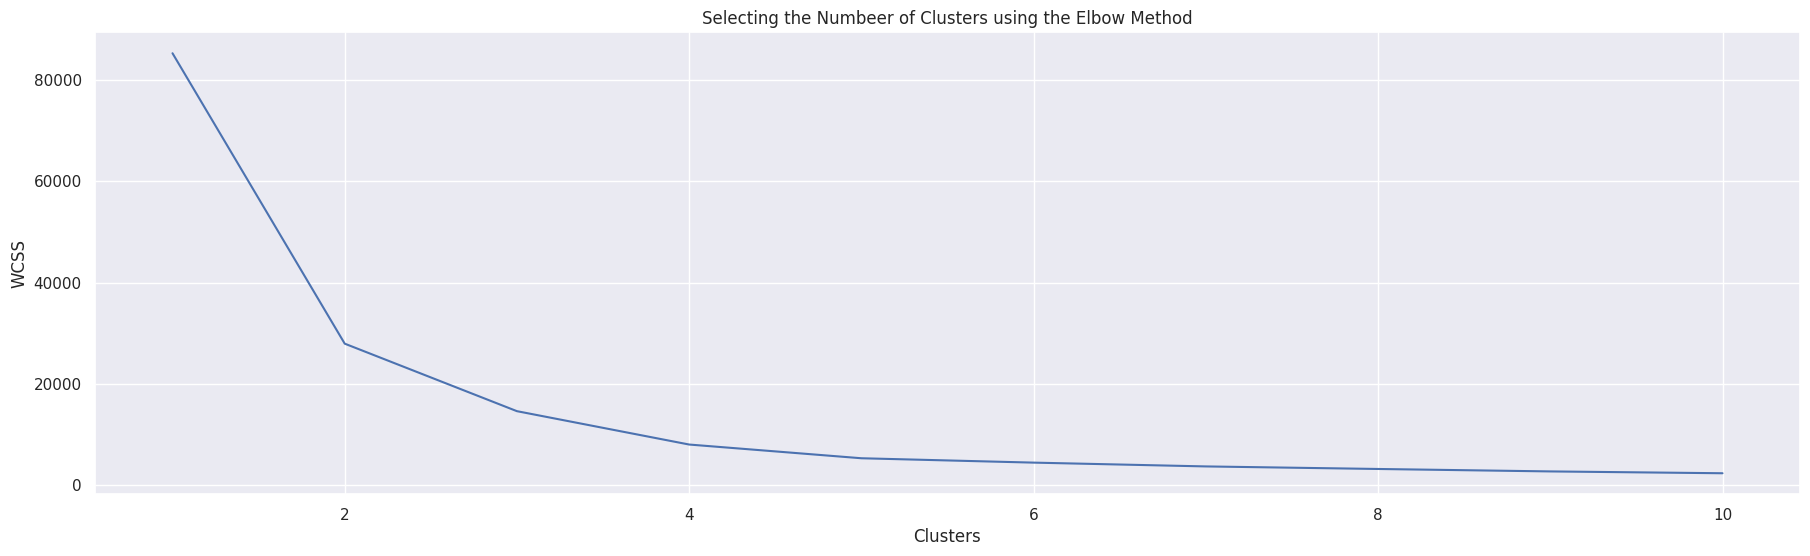

In [ ]:
wcss = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


sns.set()

plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
dfres.columns

Index(['winner_odds', 'type_False', 'type_True', 'total', 'accurate'], dtype='object')

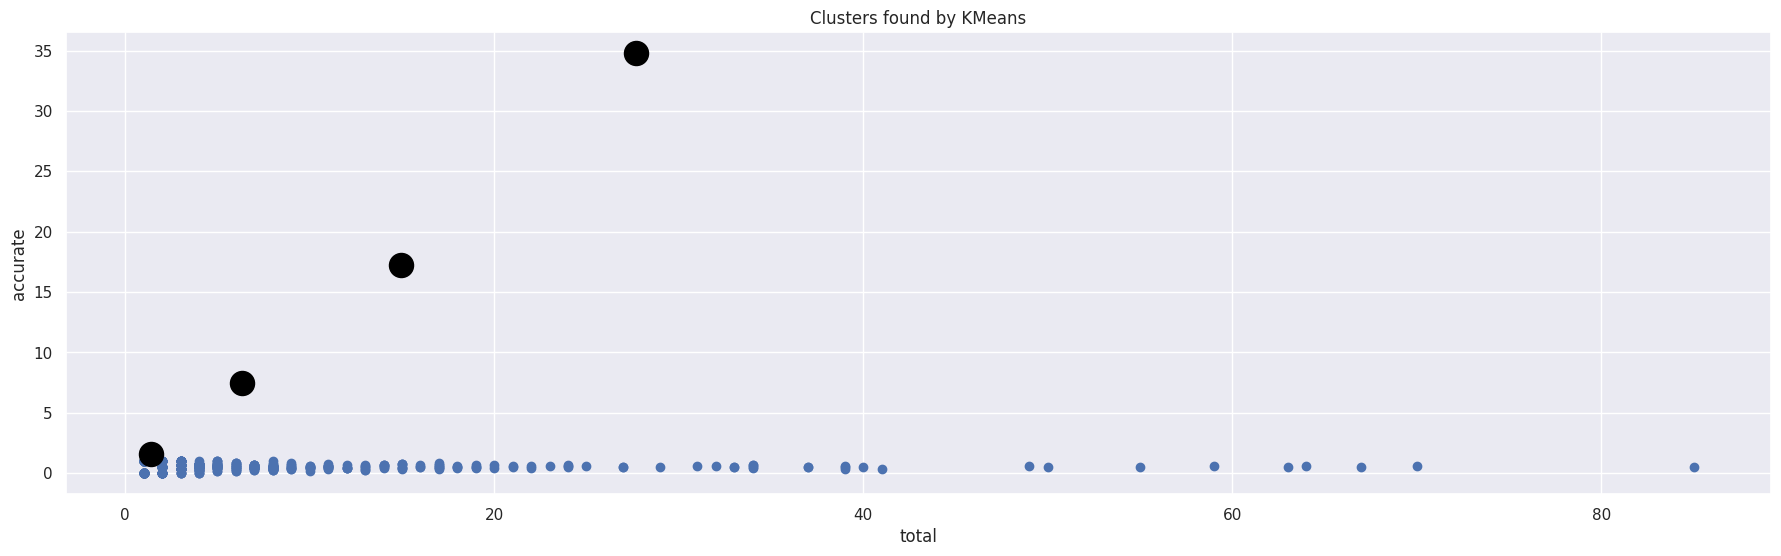

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=20, random_state=0)
y_pred = kmeans.fit_predict(X)
plt.scatter(X['total'], X['accurate'])
plt.ylabel("accurate")
plt.xlabel("total")
plt.title("Clusters found by KMeans")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
plt.show()




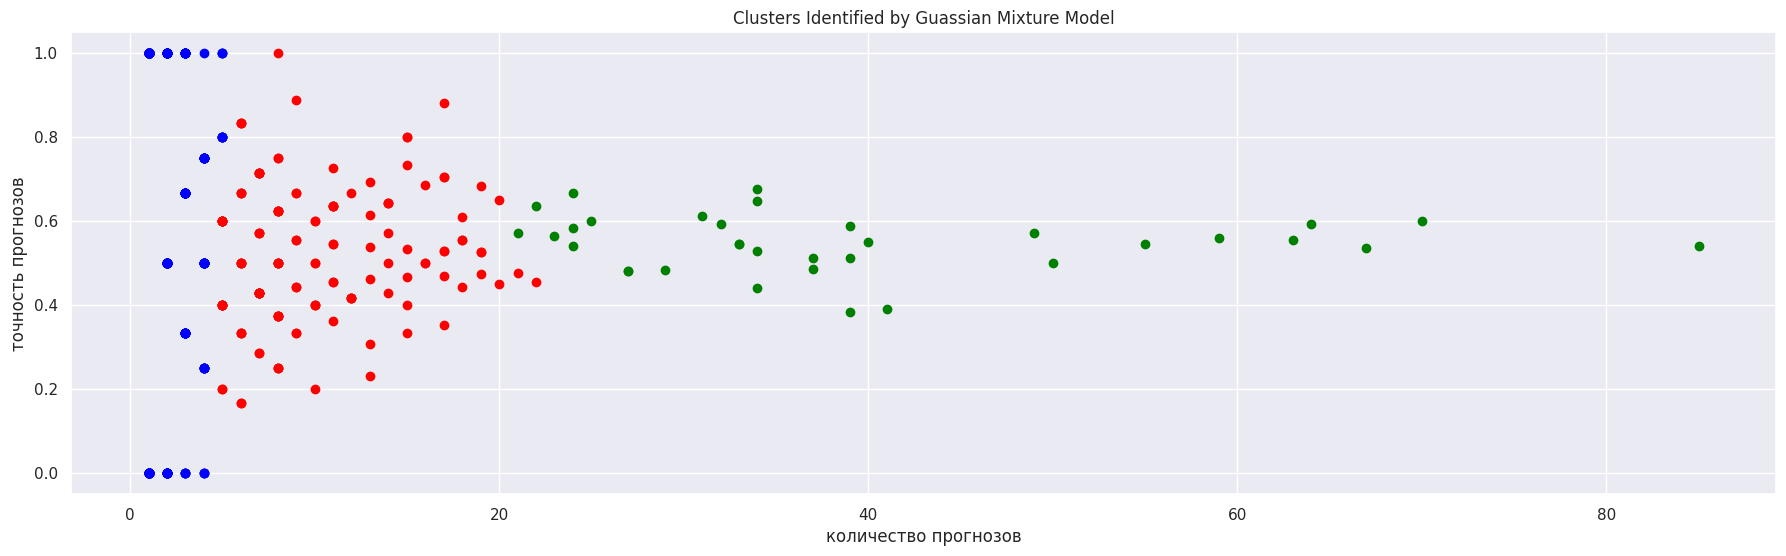

In [ ]:
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters, random_state=5)
gmm_model.fit(X)


cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels


color=['blue','green','red', 'black', 'yellow']
for k in range(0,n_clusters):
    data = X[X["cluster"]==k].copy()
    plt.scatter(data["total"],data["accurate"],c=color[k])

plt.title("Clusters Identified by Guassian Mixture Model")
plt.ylabel("точность прогнозов")
plt.xlabel("количество прогнозов")
plt.show()




[Text(0.5, 1.0, 'Spectral Clustering')]

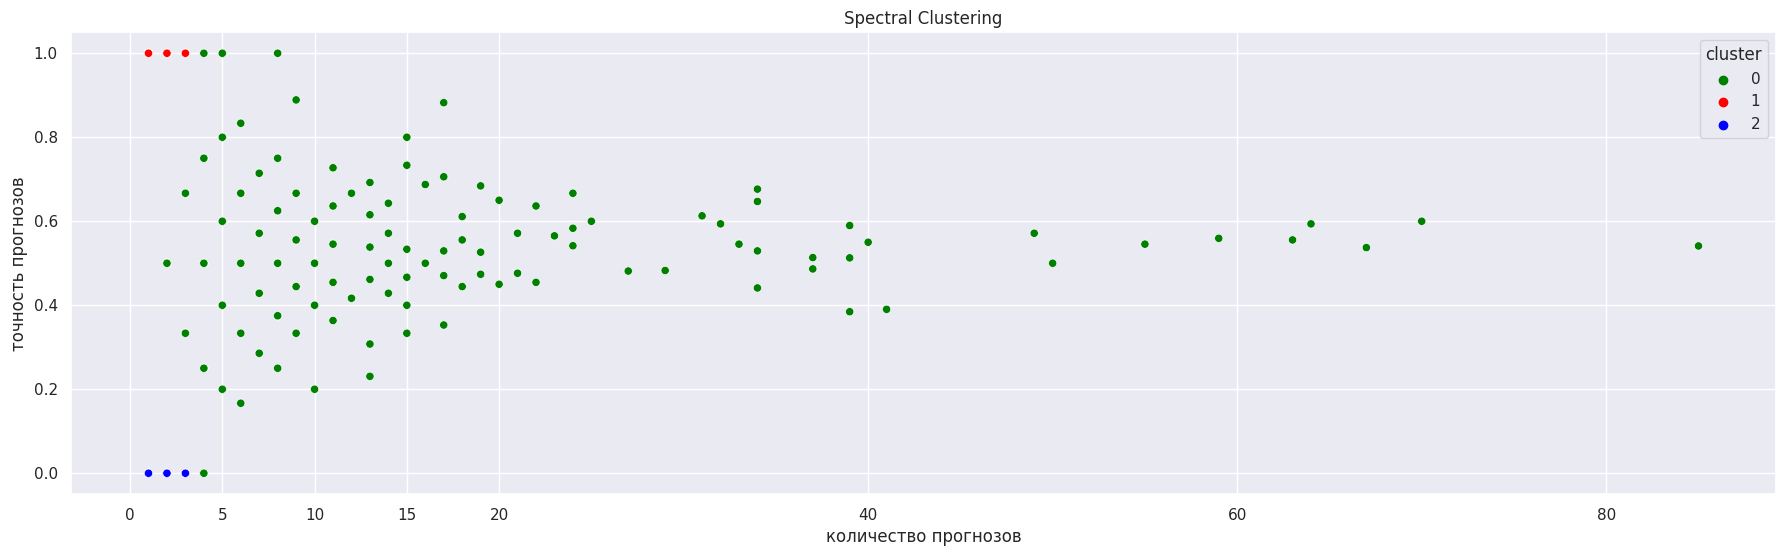

In [ ]:
from sklearn.cluster import SpectralClustering

spectral_cluster_model= SpectralClustering(
    n_clusters=3,
    random_state=64,
    n_neighbors=30,
    affinity='nearest_neighbors'
)


X['cluster'] = spectral_cluster_model.fit_predict(X)


fig, ax = plt.subplots()
sns.scatterplot(x='total', y='accurate', data=X, hue='cluster', ax=ax, palette=['green','red','blue']).set_xticks([0, 5, 10, 15, 20, 40,60,80])
plt.ylabel("точность прогнозов")
plt.xlabel("количество прогнозов")
ax.set(title='Spectral Clustering')

[Text(0.5, 1.0, 'Spectral Clustering')]

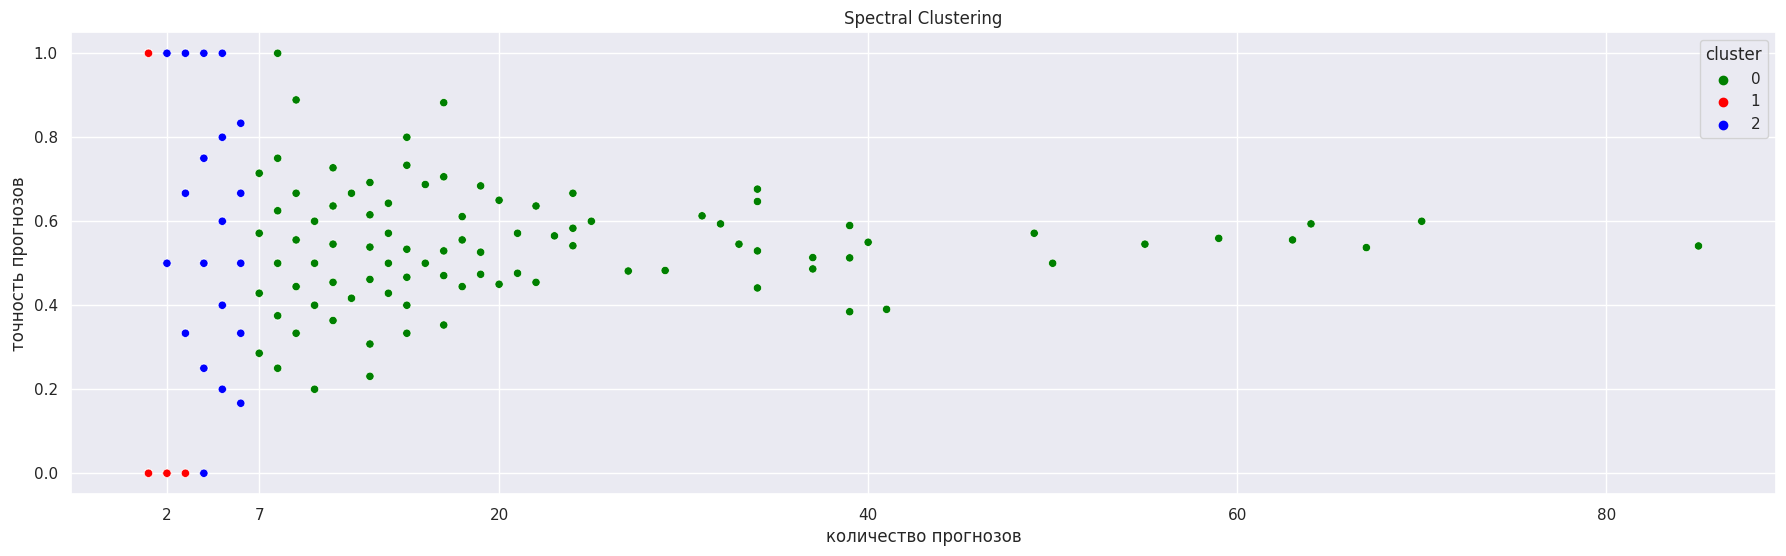

In [ ]:
from sklearn.cluster import SpectralClustering

spectral_cluster_model= SpectralClustering(
    n_clusters=3,
    random_state=64,
    n_neighbors=115,
    affinity='nearest_neighbors'
)


X['cluster'] = spectral_cluster_model.fit_predict(X)


fig, ax = plt.subplots()
sns.scatterplot(x='total', y='accurate', data=X, hue='cluster', ax=ax, palette=['green','red','blue']).set_xticks([2,7,20,40,60,80])
plt.ylabel("точность прогнозов")
plt.xlabel("количество прогнозов")
ax.set(title='Spectral Clustering')

In [ ]:
X = dfres[['type_False', 'type_True', 'total', 'accurate']].copy()

[Text(0.5, 1.0, 'DBSCAN')]

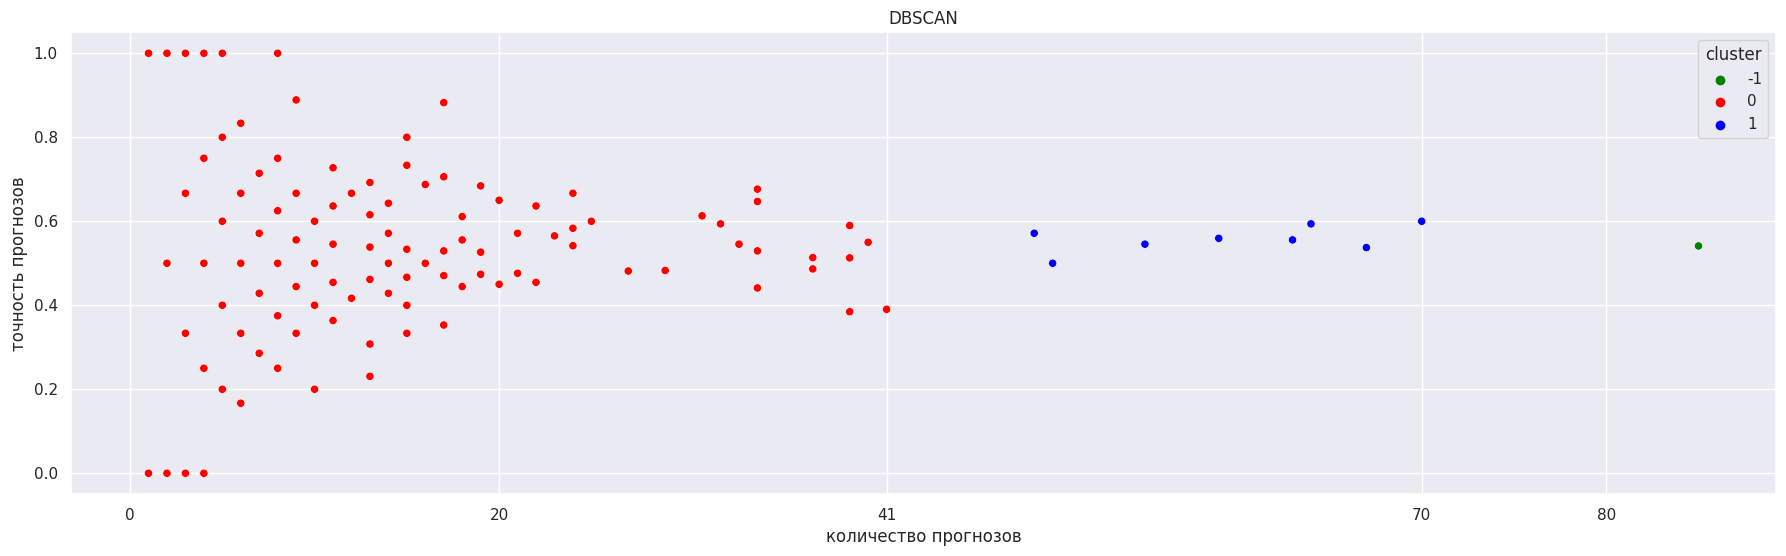

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 3).fit(X) # fitting the model
labels = dbscan.labels_ # getting the labels
X['cluster'] = labels



fig, ax = plt.subplots()
sns.scatterplot(x='total', y='accurate', data=X, hue='cluster', ax=ax, palette=['green','red','blue']).set_xticks([0,20,41,70,80])
plt.ylabel("точность прогнозов")
plt.xlabel("количество прогнозов")
ax.set(title='DBSCAN')

# distribution

In [ ]:
pip install fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.6 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26054 sha256=e087476e867dd92d680f1b32ab7a44771eb79bcba126eb8c35e1c0e3ce637e04
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built fitter
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitt

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
alpha,0.003794,1484.599937,1501.821931,inf,0.183622,2.406707e-68
burr12,0.009608,1551.541745,1574.504403,inf,0.259990,1.243235e-137
burr,0.013213,1588.505074,1611.467732,inf,0.173369,6.350433e-61
invweibull,0.013550,1577.328092,1594.550085,inf,0.177536,6.914545e-64
genextreme,0.013550,1577.316636,1594.538629,inf,0.177539,6.874129e-64


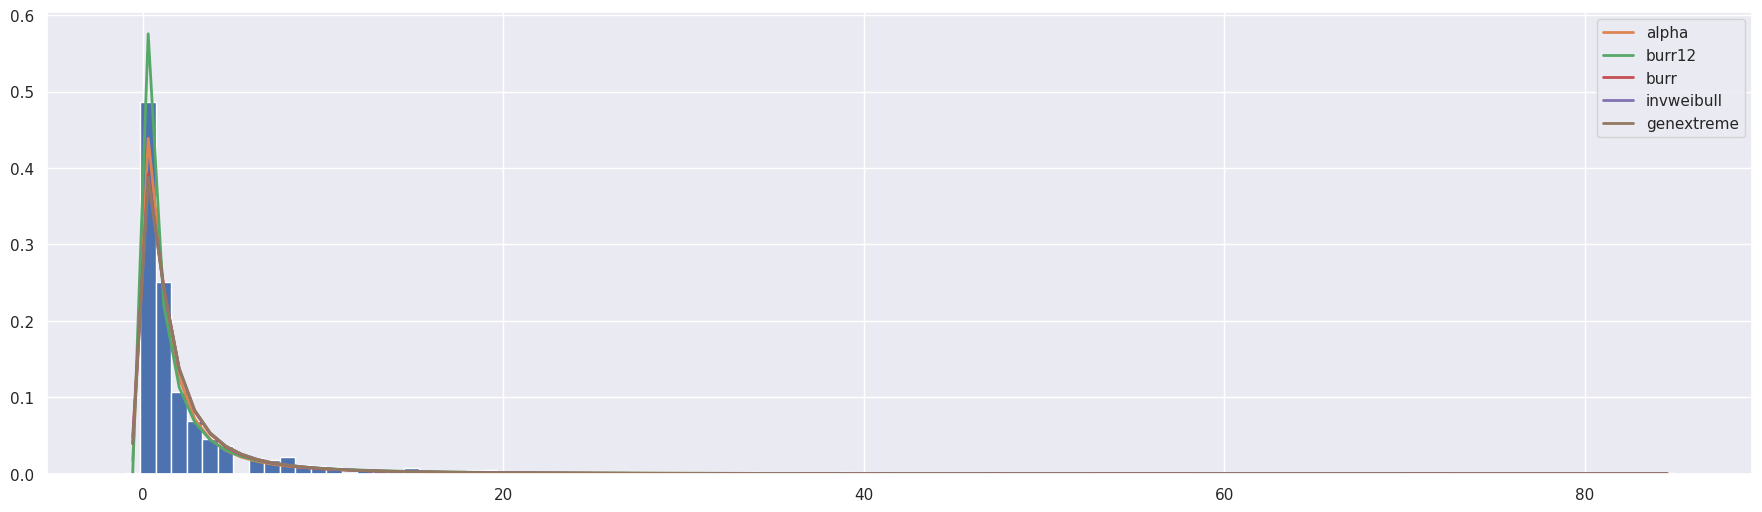

In [ ]:
from fitter import Fitter
f = Fitter(X)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [ ]:
X.columns

Index(['type_False', 'type_True', 'total', 'accurate', 'cluster'], dtype='object')

In [ ]:
X

,type_False,type_True,total,accurate,cluster
predictor,,,,,
A.J. McKee,2,0,2,0.000000,0
Aaron Pico,1,1,2,0.500000,0
Abu Azaitar,0,1,1,1.000000,0
Adam Milstead,2,4,6,0.666667,0
Adam Townsend,11,10,21,0.476190,0
...,...,...,...,...,...
Yana Kunitskaya,1,0,1,0.000000,0
Youssef Zalal,3,6,9,0.666667,0
Zach Makovsky,1,1,2,0.500000,0


In [ ]:
z = X.loc[:,['total', 'accurate']]

In [ ]:
z = X.loc[:,['accurate']]

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
weibull_max,735.175316,341.092364,353.486043,inf,0.329931,4.106610e-45
johnsonsb,797.482825,342.883866,359.408772,inf,0.438828,3.815865e-81
exponweib,857.875673,187.048367,203.573273,inf,0.588356,4.116336e-152
arcsine,860.950961,68.863886,77.126339,inf,0.226370,3.391974e-21
gengamma,870.732846,89.314195,105.839101,inf,0.436760,2.390576e-80


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


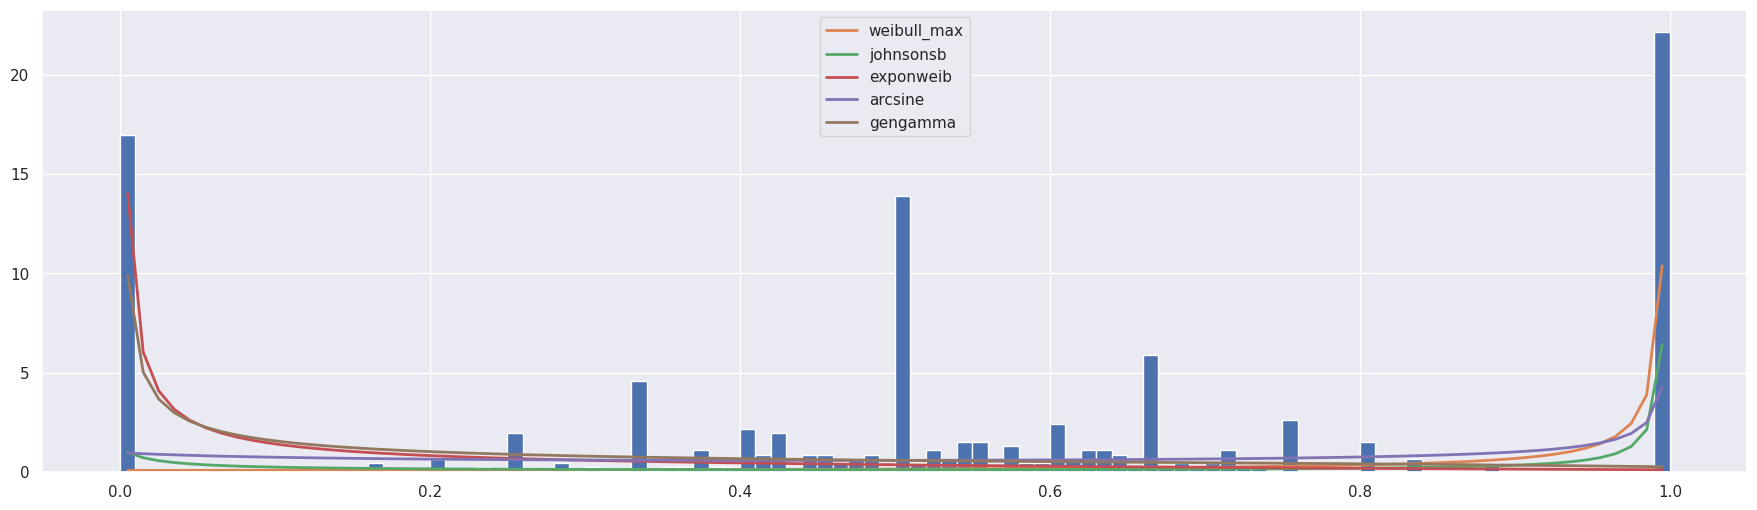

In [ ]:
from fitter import Fitter
f = Fitter(z)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [ ]:
z

,accurate
predictor,
A.J. McKee,0.000000
Aaron Pico,0.500000
Abu Azaitar,1.000000
Adam Milstead,0.666667
Adam Townsend,0.476190
...,...
Yana Kunitskaya,0.000000
Youssef Zalal,0.666667
Zach Makovsky,0.500000


In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(z, *['accurate'], **{})
chart

In [ ]:
z = X[X.total>8]
z

,type_False,type_True,total,accurate,cluster
predictor,,,,,
Adam Townsend,11,10,21,0.476190,0
Aiemann Zahabi,5,6,11,0.545455,0
Alan Jouban,8,10,18,0.555556,0
Albert Morales,12,19,31,0.612903,0
Alex Hernandez,10,3,13,0.230769,0
...,...,...,...,...,...
Vinc Pichel,10,14,24,0.583333,0
Volkan Oezdemir,7,11,18,0.611111,0
Youssef Zalal,3,6,9,0.666667,0


In [ ]:
z = z.loc[:,['accurate']]
z

,accurate
predictor,
Adam Townsend,0.476190
Aiemann Zahabi,0.545455
Alan Jouban,0.555556
Albert Morales,0.612903
Alex Hernandez,0.230769
...,...
Volkan Oezdemir,0.611111
Walt Harris,0.250000
Youssef Zalal,0.666667


In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(z, *['accurate'], **{})
chart

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
nct,0.034376,1263.977650,1281.106717,inf,0.238511,2.897167e-27
t,0.049629,1388.245198,1401.091998,inf,0.409656,1.055865e-81
burr12,0.053628,1227.978820,1245.107887,inf,0.208164,8.198302e-21
norminvgauss,0.068195,1232.798050,1249.927117,inf,0.216700,1.554170e-22
genhyperbolic,0.088907,1208.129143,1229.540476,inf,0.132798,1.092343e-08


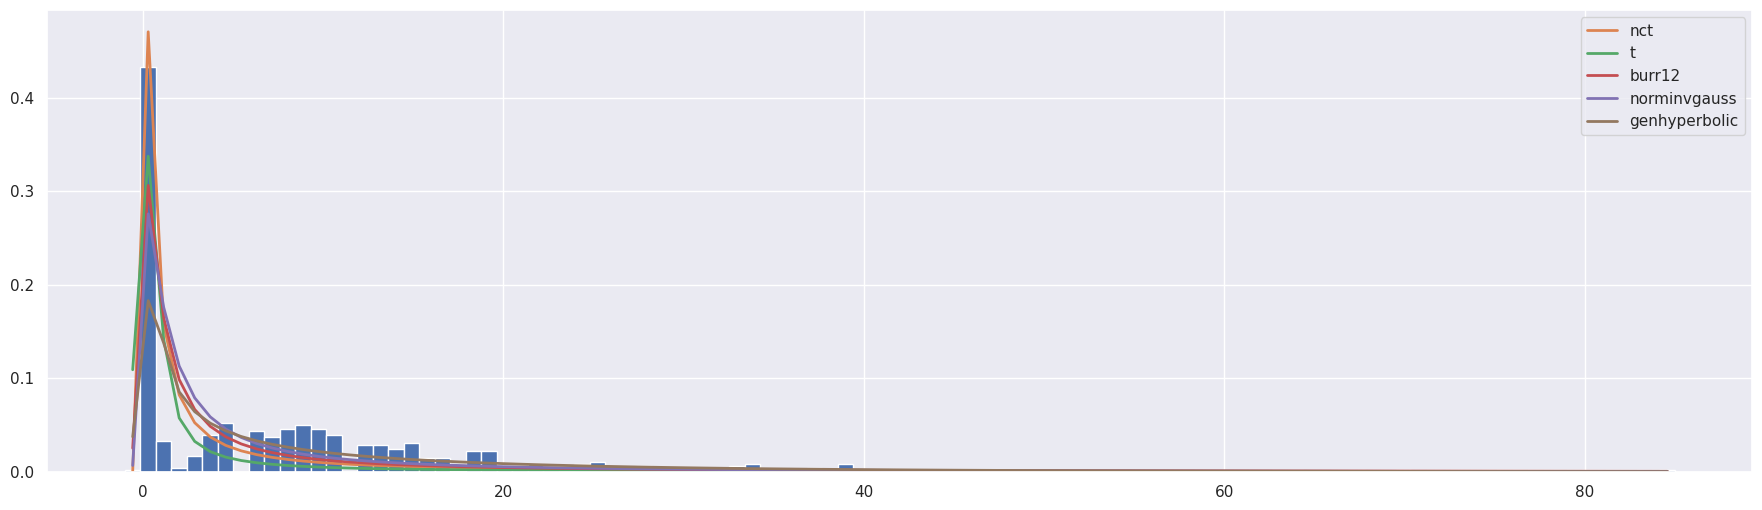

In [ ]:
from fitter import Fitter
f = Fitter(z)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

# чуть большие данные)))

https://www.kaggle.com/datasets/danmcinerney/mma-differentials-and-elo

About Dataset
MMA-AI.net

This dataset uses ufcstats.com. For each fight, we calculated the technique differential between the opponents and also the fighter's historical average technique differential.

Differential stats are calculated by diving the two individual's technique stats. For example, if Conor hits Khabib 10 times, and Khabib hits Conor 5 times, then Conor's differential stat is 10/5 = 2. Khabib's differential stat is 0.5.

This dataset tracks the following basic stats:

date
fight_url
event_url
result
fighter
opponent
division
stance
dob
method
total_comp_time
round
time
fighter_url
opponent_url
referee
time_format
reach
height
age
knockdowns
sub_attempts
reversals
control
takedowns_landed
takedowns_attempts
sig_strikes_landed
sig_strikes_attempts
total_strikes_landed
total_strikes_attempts
head_strikes_landed
head_strikes_attempts
body_strikes_landed
body_strikes_attempts
leg_strikes_landed
leg_strikes_attempts
distance_strikes_landed
distance_strikes_attempts
clinch_strikes_landed
clinch_strikes_attempts
ground_strikes_landed
ground_strikes_attempts
KO_losses
days_since_last_comp
lose_streak
win_streak
win_loss_ratio
total_comp_time
stamina
num_fights
trueskill
elo
It then parses those stats starting at reach and creates several new categories for each:

stat_differential
stat_per_min
stat_accuracy
stat_def
stat_peak
stat_valley
stat_vs_peak
stat_vs_valley
Then it further modifies those categories above with:

avg_stat
recent_avg_stat
Then for each of those it does:

change_stat
stat_vs_opp
Exploring the data

See all of Jon Jones' stats
df.loc[df['fighter'] == 'jon jones']

See all of Jon Jones' striking differential stats
df.loc[df['fighter'] == 'jon jones'].filter(like='sig_strikes_differential')

See Jon Jones' postfight Elo scores and who his opponents were
df.loc[df['fighter'] == 'jon jones'].loc[:, ['opponent', 'elo']]

See Jon Jones' postfight ground control time, average ground control, and peak ground control
df.loc[df['fighter'] == 'jon jones'].loc[:, ['opponent', 'control', 'avg_control', 'control_peak']]

See Jon Jones' prefight average ground control vs his opponent's average ground control
df.loc[df['fighter'] == 'jon jones'].loc[:, ['opponent', 'precom_avg_control_vs_opp']]

In [ ]:
url =  "https://drive.google.com/file/d/1vug2SdRcH9aj831C3RQymHBnykCmzzNI/view?usp=drive_link"

In [ ]:
!wget "https://drive.google.com/file/d/1vug2SdRcH9aj831C3RQymHBnykCmzzNI/view?usp=drive_link"  -P "/content/drive/My Drive/imgcaptiongen/data"

--2023-08-11 06:59:36--  https://drive.google.com/file/d/1vug2SdRcH9aj831C3RQymHBnykCmzzNI/view?usp=drive_link
Resolving drive.google.com (drive.google.com)... 74.125.126.113, 74.125.126.139, 74.125.126.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.126.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/drive/My Drive/imgcaptiongen/data/view?usp=drive_link’

view?usp=drive_link     [ <=>                ]  77.73K  --.-KB/s    in 0.002s  

2023-08-11 06:59:36 (32.9 MB/s) - ‘/content/drive/My Drive/imgcaptiongen/data/view?usp=drive_link’ saved [79592]



In [ ]:
!gdown --id 1vug2SdRcH9aj831C3RQymHBnykCmzzNI

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vug2SdRcH9aj831C3RQymHBnykCmzzNI
To: /content/masterMLpublic.csv
100% 2.33G/2.33G [00:25<00:00, 90.6MB/s]


In [ ]:
bds = pd.read_csv('/content/masterMLpublic.csv')

In [ ]:
print(bds.columns)

Index(['date', 'fight_url', 'event_url', 'result', 'title_fight', 'fighter',
       'opponent', 'stance', 'dob', 'division',
       ...
       'precomp_change_recent_avg_ground_strikes_landed_per_min_differential_vs_peak_vs_opp',
       'precomp_change_recent_avg_ground_strikes_landed_per_min_differential_vs_valley_vs_opp',
       'precomp_change_avg_ground_strikes_attempts_per_min_differential_peak_vs_opp',
       'precomp_change_avg_ground_strikes_attempts_per_min_differential_valley_vs_opp',
       'precomp_change_avg_ground_strikes_attempts_per_min_differential_vs_peak_vs_opp',
       'precomp_change_avg_ground_strikes_attempts_per_min_differential_vs_valley_vs_opp',
       'precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_peak_vs_opp',
       'precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_valley_vs_opp',
       'precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_vs_peak_vs_opp',
       'precomp_change_recent_avg_gr

In [ ]:
bds.loc[bds['fighter'] == 'jon jones']

,date,fight_url,event_url,result,title_fight,fighter,opponent,stance,dob,division,...,precomp_change_recent_avg_ground_strikes_landed_per_min_differential_vs_peak_vs_opp,precomp_change_recent_avg_ground_strikes_landed_per_min_differential_vs_valley_vs_opp,precomp_change_avg_ground_strikes_attempts_per_min_differential_peak_vs_opp,precomp_change_avg_ground_strikes_attempts_per_min_differential_valley_vs_opp,precomp_change_avg_ground_strikes_attempts_per_min_differential_vs_peak_vs_opp,precomp_change_avg_ground_strikes_attempts_per_min_differential_vs_valley_vs_opp,precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_peak_vs_opp,precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_valley_vs_opp,precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_vs_peak_vs_opp,precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_vs_valley_vs_opp
1885,2008-08-09,http://ufcstats.com/fight-details/c5e0e4ee1190...,http://ufcstats.com/event-details/19ffeb5e3fff...,1,0.0,jon jones,andre gusmao,Orthodox,1987-07-19,Light Heavyweight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2093,2009-01-31,http://ufcstats.com/fight-details/afb9d3476c5c...,http://ufcstats.com/event-details/2a542ee8a8b8...,1,0.0,jon jones,stephan bonnar,Orthodox,1987-07-19,Light Heavyweight,...,-0.094978,-1.589349,0.000000,0.000000,-0.015988,-0.101923,0.000000,0.000000,-0.150639,-2.722682
2277,2009-07-11,http://ufcstats.com/fight-details/6f6158830b01...,http://ufcstats.com/event-details/0ee783aa00e4...,1,0.0,jon jones,jake o'brien,Orthodox,1987-07-19,Light Heavyweight,...,1.083116,1.000000,20.736667,0.338514,0.040530,62.210000,21.070000,21.352395,1.059436,1.000000
2462,2009-12-05,http://ufcstats.com/fight-details/3f0826158f87...,http://ufcstats.com/event-details/91d73ee59347...,0,0.0,jon jones,matt hamill,Orthodox,1987-07-19,Light Heavyweight,...,-0.268249,0.148382,0.000000,0.000000,-0.232381,-19.903111,0.000000,-6.441556,0.424099,1.664570
2591,2010-03-21,http://ufcstats.com/fight-details/43f049585547...,http://ufcstats.com/event-details/3795fca327cb...,1,0.0,jon jones,brandon vera,Orthodox,1987-07-19,Light Heavyweight,...,0.367688,3.577087,0.000000,0.000000,-0.079653,-9.452480,0.000000,0.000000,0.194722,1.274403
2781,2010-08-01,http://ufcstats.com/fight-details/7949430ebc47...,http://ufcstats.com/event-details/f12f979b657a...,1,0.0,jon jones,vladimir matyushenko,Orthodox,1987-07-19,Light Heavyweight,...,-0.532962,-1.580404,0.000000,0.000000,0.070161,-0.480285,0.000000,-10.274735,-0.466455,0.210530
3055,2011-02-05,http://ufcstats.com/fight-details/65ce293c20bd...,http://ufcstats.com/event-details/65ddc8a9ac4e...,1,0.0,jon jones,ryan bader,Orthodox,1987-07-19,Light Heavyweight,...,0.620263,0.000000,0.000000,0.000000,0.014628,-4.580585,0.000000,7.719707,0.601616,0.000000
3129,2011-03-19,http://ufcstats.com/fight-details/dc2a3aeac144...,http://ufcstats.com/event-details/1411c630ba71...,1,1.0,jon jones,mauricio rua,Orthodox,1987-07-19,Light Heavyweight,...,-0.390640,-3.350400,-1.172491,0.000000,-0.474108,-5.600943,-2.430870,-0.407963,-0.488786,-3.828437
3401,2011-09-24,http://ufcstats.com/fight-details/181ce41897b3...,http://ufcstats.com/event-details/73ef22f25d0f...,1,1.0,jon jones,quinton jackson,Orthodox,1987-07-19,Light Heavyweight,...,-0.344084,-1.607263,0.000000,0.000000,-0.077818,-3.040121,0.000000,-3.041148,-0.356917,-1.395575
3573,2011-12-10,http://ufcstats.com/fight-details/834968d130e1...,http://ufcstats.com/event-details/6d7886b094b4...,1,1.0,jon jones,lyoto machida,Orthodox,1987-07-19,Light Heavyweight,...,0.316871,3.046868,0.000000,1.484494,-0.026087,-2.284789,0.000000,0.072612,0.002095,1.315993


See all of Jon Jones' striking differential stats

In [ ]:
bds.loc[bds['fighter'] == 'jon jones'].filter(like='sig_strikes_differential')

""
1885
2093
2277
2462
2591
2781
3055
3129
3401
3573


See Jon Jones' postfight Elo scores and who his opponents were

In [ ]:
bds.loc[bds['fighter'] == 'jon jones'].loc[:, ['opponent', 'elo']]

,opponent,elo
1885,andre gusmao,1235.259035
2093,stephan bonnar,1281.610184
2277,jake o'brien,1328.601976
2462,matt hamill,1328.601976
2591,brandon vera,1382.072773
2781,vladimir matyushenko,1423.413219
3055,ryan bader,1478.025150
3129,mauricio rua,1522.739696
3401,quinton jackson,1562.541721
3573,lyoto machida,1599.151990


See Jon Jones' postfight ground control time, average ground control, and peak ground control

In [ ]:
bds.loc[bds['fighter'] == 'jon jones'].loc[:, ['opponent', 'control', 'avg_control', 'control_peak']]

,opponent,control,avg_control,control_peak
1885,andre gusmao,256,256.000000,256
2093,stephan bonnar,249,252.500000,256
2277,jake o'brien,34,179.666667,256
2462,matt hamill,84,155.750000,256
2591,brandon vera,163,157.200000,256
2781,vladimir matyushenko,54,140.000000,256
3055,ryan bader,262,157.428571,262
3129,mauricio rua,470,196.500000,470
3401,quinton jackson,212,198.222222,470
3573,lyoto machida,87,187.100000,470


See Jon Jones' prefight average ground control vs his opponent's average ground control

In [ ]:
bds.loc[bds['fighter'] == 'jon jones'].loc[:, ['opponent', 'precom_avg_control_vs_opp']]